In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import bar_chart_race as bcr
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(style="darkgrid")
COLOR_PALETTE = "Paired"
def prepare_colors(n):
    return sns.color_palette(COLOR_PALETTE)[:n]

In [3]:
df = pd.read_csv("Most Popular Programming Languages from 2004 to 2022.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")

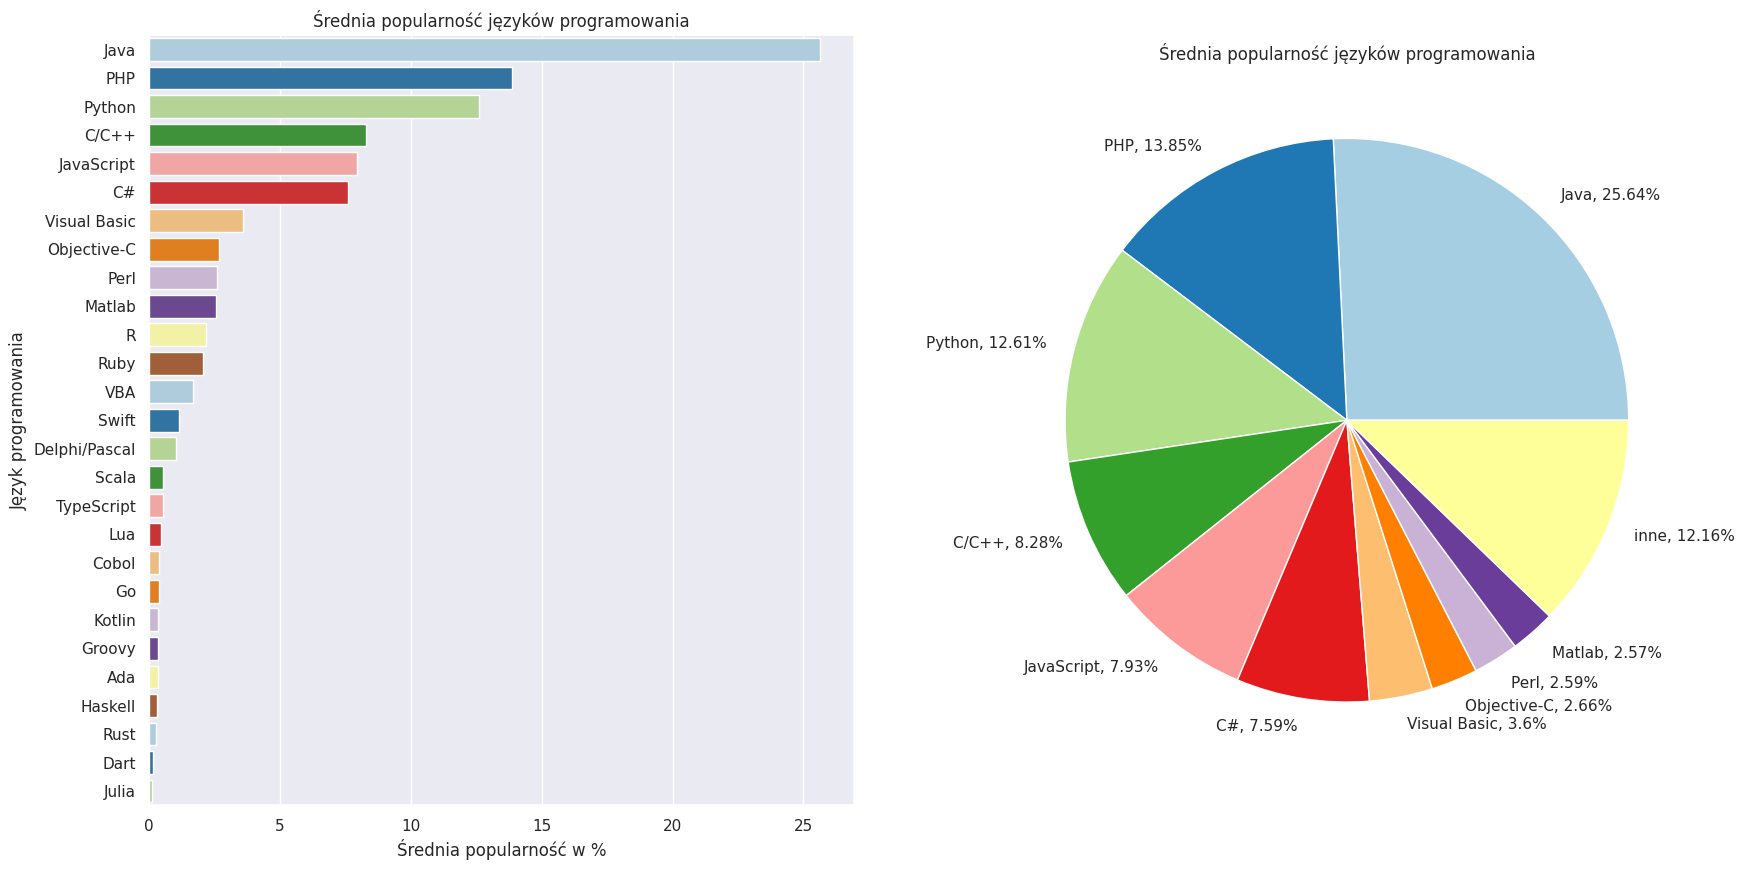

In [4]:
mean_of_usage = {col: df[col].mean() for col in df.columns[1:]}
mean_of_usage = dict(sorted(mean_of_usage.items(), key=lambda x: x[1], reverse=True))
top_languages = {key: value for index, (key, value) in enumerate(mean_of_usage.items()) if index <10}
top_languages["inne"] = sum([value for index, value in enumerate(mean_of_usage.values()) if index >= 10])
top_languages_labels = [f"{key}, {value.round(2)}%" for key, value in top_languages.items()]
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(y=list(mean_of_usage.keys()), x=list(mean_of_usage.values()), palette=prepare_colors(len(mean_of_usage)))
plt.title("Średnia popularność języków programowania")
plt.xlabel("Średnia popularność w %")
plt.ylabel("Język programowania")
plt.subplot(1, 2, 2)
plt.title("Średnia popularność języków programowania")
a = plt.pie(top_languages.values(), labels=top_languages_labels, colors=prepare_colors(len(top_languages)))


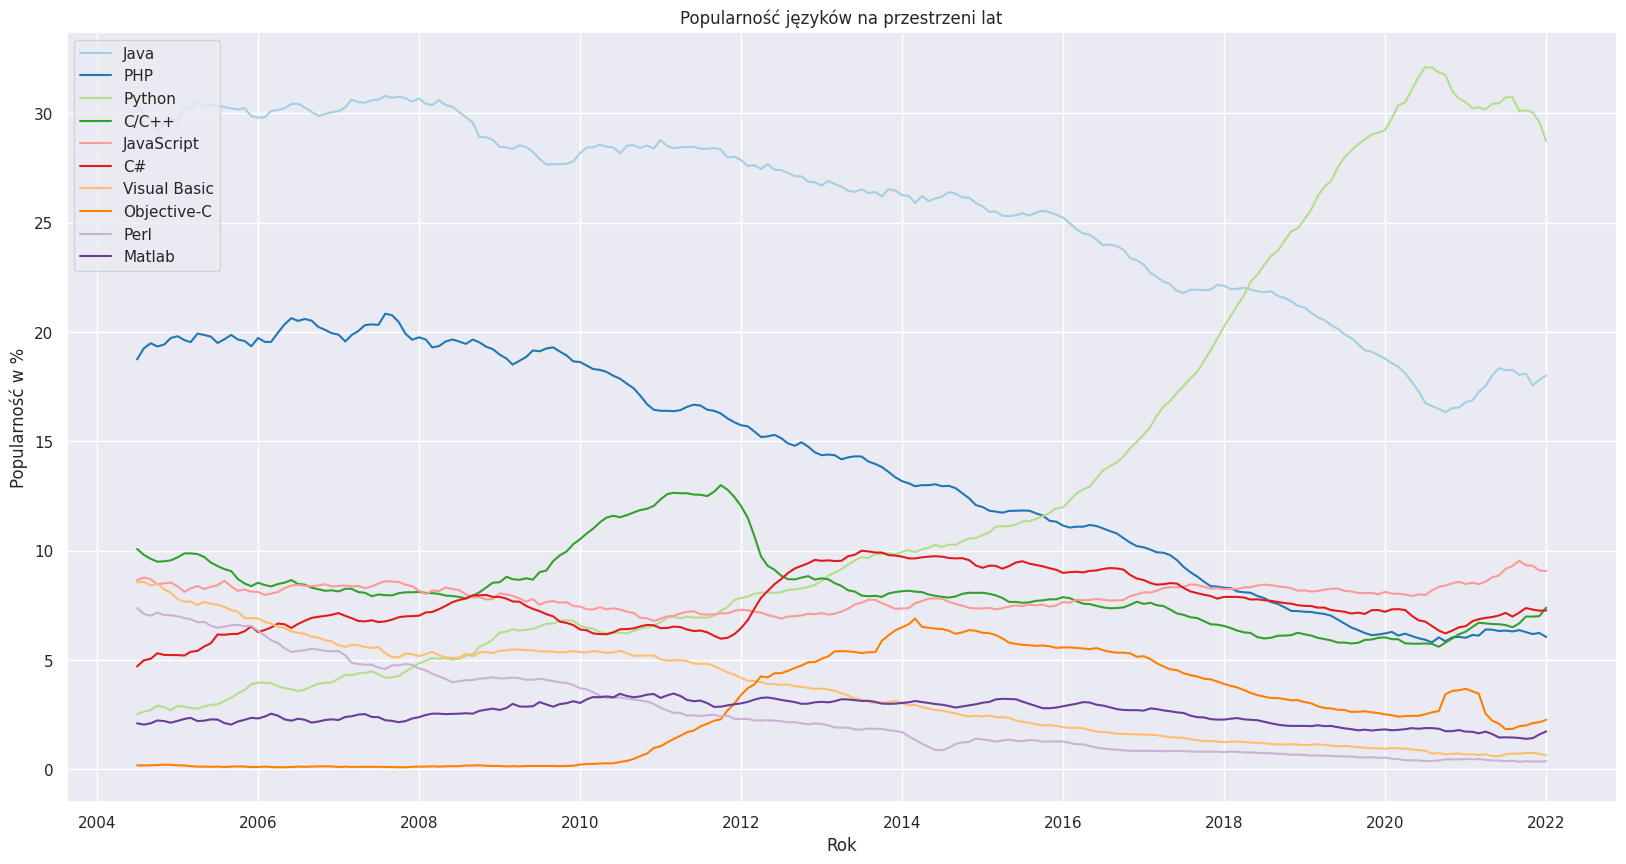

In [5]:
plot_colors = prepare_colors(10)
plt.figure(figsize=(20,10))
for index, value in enumerate(mean_of_usage.keys()):
    if index == 10:
        break
    plt.plot(df.index, df[value], label=value, color=plot_colors[index])
    plt.legend()
plt.title("Popularność języków na przestrzeni lat")
plt.xlabel("Rok")
plt.ylabel("Popularność w %")

plt.legend(loc="upper left")
plt.show()



In [6]:
top10_language = top_languages.keys()

fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(1, 1, 1)


def animate(i):
    top10_value = []
    for key in top10_language:
        if key != "inne":
            top10_value.append(df[key][i])
        else:
            top10_value.append(sum(df[[x for x in df.columns if x not in top10_language]].iloc[i]))
    top10_value = tuple(top10_value)
    date_bar = df.index[i].strftime("%Y %B")
    ax.cla()
    ax.pie(top10_value, labels=top10_language, colors=prepare_colors(len(top_languages)))
    ax.set_title(f"Popularność w miesiącu: {date_bar}", loc="left")


ani = FuncAnimation(fig, animate, repeat=False, frames=len(df))

%time ani.save("donut_animation.gif", fps=5)
plt.close()

CPU times: user 15.7 s, sys: 1.02 s, total: 16.7 s
Wall time: 26.7 s


In [7]:
HTML("<img src='donut_animation.gif'>")

In [8]:

bcr.bar_chart_race(df=df, n_bars=20, figsize=(20,10), filename=None, title="Popularność języków programowania na przestrzeni lat", cmap=COLOR_PALETTE)